In [1]:
# Nessary Libraries
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loding 

In [2]:
#loading the data
cost=pd.read_excel("Customer_Data.xlsx",sheet_name="Cost")
vi=pd.read_excel("Customer_Data.xlsx",sheet_name="Value Info")
di=pd.read_excel("Customer_Data.xlsx",sheet_name="Demographic Info")

In [3]:
#Merging the data on the customer id
data=di.merge(vi,on="Customer ID",how="outer")

### Data Exploration and Pre-Processing

In [4]:
print("number of rows and columns in both (Value Info and Demographic Info) the data set :")
vi.shape,di.shape

number of rows and columns in both (Value Info and Demographic Info) the data set :


((30591, 5), (31441, 7))

+ number of records in both data are not equal, we might expect NAN values

In [5]:
print("Dimention of the data :")
data.shape

Dimention of the data :


(31441, 11)

+ Merged Data dimention

In [6]:
#checking dtype of col's
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31441 entries, 0 to 31440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer ID                    31441 non-null  int64         
 1   Title                          27363 non-null  object        
 2   Date Of Birth                  31441 non-null  datetime64[ns]
 3   Address City                   31441 non-null  object        
 4   Contact Allowed                31441 non-null  object        
 5   Registration Date              31441 non-null  datetime64[ns]
 6   Source of Customer             31441 non-null  object        
 7   1st Order Profit               30591 non-null  float64       
 8   Subsequent Order Profit        30591 non-null  float64       
 9   Subsequent Orders Count        30591 non-null  float64       
 10  Total value of all promotions  30591 non-null  float64       
dtypes: datetime64[n

+ Checking what class each column belongs to, we have date time ; int; float and object type of data.

In [7]:
#checking for duplicate records
print("Any duplicated values :")
data.duplicated().sum()

Any duplicated values :


0

In [8]:
#check for missing data
print("percentage of missing values :")
((data.isnull().sum())/data.shape[0])*100

percentage of missing values :


Customer ID                       0.000000
Title                            12.970325
Date Of Birth                     0.000000
Address City                      0.000000
Contact Allowed                   0.000000
Registration Date                 0.000000
Source of Customer                0.000000
1st Order Profit                  2.703476
Subsequent Order Profit           2.703476
Subsequent Orders Count           2.703476
Total value of all promotions     2.703476
dtype: float64

### Handeling NAN Values 

+ Nan values are imputed as "0" for column dtype float and "unknown" for dtype object

In [9]:
#Imputing missing values for column "Title"
data.loc[:,"Title"].fillna("UnKnown",inplace=True)
(data.loc[:,"Title"].value_counts()/data.shape[0])*100

Mr         63.550778
UnKnown    12.970325
Miss        8.625680
Ms          7.442511
Mrs         7.410706
Name: Title, dtype: float64

In [10]:
#Imputing missing values for column "1st Order Profit", "Subsequent Order Profit", "Subsequent Orders Count", and
#"Total value of all promotions"
columns_to_fill = ["1st Order Profit", "Subsequent Order Profit", "Subsequent Orders Count", "Total value of all promotions"]
data[columns_to_fill]=data[columns_to_fill].fillna(0)

In [11]:
#rechecking for the presence of missing values
print("percentage of missing values :")
((data.isnull().sum())/data.shape[0])*100

percentage of missing values :


Customer ID                      0.0
Title                            0.0
Date Of Birth                    0.0
Address City                     0.0
Contact Allowed                  0.0
Registration Date                0.0
Source of Customer               0.0
1st Order Profit                 0.0
Subsequent Order Profit          0.0
Subsequent Orders Count          0.0
Total value of all promotions    0.0
dtype: float64

### Other Categorical Data 

+ Genral idea of other categorical columns in the dataset and what portions do each class belong to.

In [12]:
#Contact Allowed
((data["Contact Allowed"].value_counts())/data.shape[0])*100

Y    57.701727
N    42.298273
Name: Contact Allowed, dtype: float64

In [13]:
#Address City
((data["Address City"].value_counts())/data.shape[0])*100

Dublin         69.186731
Cork            3.412741
Galway          2.102350
Limerick        2.013295
Waterford       1.246780
Kilkenny        0.846029
Wexford         0.798321
Dundalk         0.776057
Mullingar       0.772876
Tallaght        0.756973
Carlow          0.731529
Lucan           0.728348
Navan           0.715626
Naas            0.683820
Bray            0.664737
Tralee          0.655195
Drogheda        0.642473
Swords          0.636112
Ennis           0.582043
Clonmel         0.572501
Clondalkin      0.489806
Sligo           0.483445
Enniscorthy     0.480265
Athlone         0.480265
Letterkenny     0.480265
Dungarvan       0.467542
Newbridge       0.467542
Longford        0.429376
Portlaoise      0.423015
Tullamore       0.403931
Mallow          0.397570
Ballina         0.394389
Blackrock       0.381667
Celbridge       0.381667
Cavan           0.381667
Ballinasloe     0.372126
Malahide        0.372126
Leixlip         0.362584
Nenagh          0.343501
Kildare         0.337139


In [14]:
#Source of Customer
((data["Source of Customer"].value_counts())/data.shape[0])*100

Direct            35.787666
Organic Search    26.691263
Paid Search       20.730893
Affiliates        12.302408
Paid Social        4.487771
Name: Source of Customer, dtype: float64

### Feature extraction 

+ Additional information we extract out of the existing data

In [15]:
# Age column
data["Age"]=(pd.DatetimeIndex(data["Registration Date"]).year+(pd.DatetimeIndex(data["Registration Date"]).month/12))-\
        (pd.DatetimeIndex(data["Date Of Birth"]).year+(pd.DatetimeIndex(data["Date Of Birth"]).month/12))

+ we are trying to get the age of the customer based on the "Registration Date" and "Date Of Birth" columns, using a combination of year and month information, and stores the result in a new "Age" column.

In [16]:
# Age group column 
def categorize_age(age):
    if age <= 20:
        return '<=20'
    elif age <= 40:
        return '20-40'
    elif age <= 60:
        return '40-60'
    else:
        return '> 60'

data['Age_grp'] = data['Age'].apply(categorize_age)

+ This code defines a function categorize_age that takes an "age" value as input and categorizes it into age groups and store it in a new column "Age_grp" 

In [17]:
#Gender
data["Gender"] = data["Title"].map({"Mr": "Male","Mrs": "Female","Miss":"Female","Ms":"Female","UnKnown":"UnKnown"})
((data["Gender"].value_counts())/data.shape[0])*100

Male       63.550778
Female     23.478897
UnKnown    12.970325
Name: Gender, dtype: float64

+ Based on the "Title" information we are trying to identify the gender"Male" and "Female of the customer, The NAN values are imputed as "UnKnown",it is also one of the category.

In [18]:
#Time of registration
data["Time of registration"]=(pd.DatetimeIndex(data["Registration Date"]).hour) 

+ we create a new column called "Time of registration", with the time information in the "Registration Date" column.

In [19]:
#month of registration
data["month of registration"]=(pd.DatetimeIndex(data["Registration Date"]).month).astype(str)

+ Most of the customer registration is done in the month"jan , feb and Mar" so we create a new column called "month of registration", with the month information in the "Registration Date" column.

In [20]:
#Address City new
def country(x):
    if(x not in ['Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford', 'Kilkenny']) :
        return "Other"
    else:
        return x
data["Address City new"]=data["Address City"].apply(country)

+ Since there are many cities , most of the customers belong to ['Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford', 'Kilkenny'] so we create new column called Address City new , where we categorize cities into either the specified list or "Other."

In [21]:
data["Total profit"]=data["1st Order Profit"]+data["Subsequent Order Profit"]

+ we try calculating the Total profit with "respect to 1st Order Profit" and "Subsequent Order Profit" by suming them up.

###  Analysis 

In [22]:
#Filtering customers who have not purchased
(data.loc[(data["1st Order Profit"] == 0) & (data["Subsequent Order Profit"] == 0) & 
         (data["Subsequent Orders Count"] == 0) & (data["Total value of all promotions"] == 0)].shape[0]/data.shape[0])*100

2.703476352533316

+ Around 2.70 % customers have only registeres but they have not purchased anything as their "first order" and "Subsequent Order profit" also the "Subsequent Orders Count" and "Total value of all promotions" (These are basically the NAN values which were inputed as 0)

In [23]:
#Filtering the customers who have me only one purchase
(data.loc[(data["1st Order Profit"] >= 0) & (data["Subsequent Order Profit"] == 0) \
         & (data["Subsequent Orders Count"] == 0)].shape[0]/data.shape[0])*100

36.8658757673102

+ 36.86 % customers have done theire first purchse only, and no Subsequent purchases done, try focusing on them by asking for feedbacks on their first purchase and try to identify customer who had bad experiences.

In [24]:
#Filtering the customers who have not redeemed any promotions
(data.loc[(data["1st Order Profit"] >= 0) & (data["Subsequent Order Profit"] >= 0) & \
          (data["Total value of all promotions"] == 0)].shape[0]/data.shape[0])*100

32.19999363887917

+ 32.19 % customers have made purchases but have not redeemed any promotional discounts. Try identifying them and look for the reason behind why they have not reedemed.

C:\Users\Deeksha lokesh\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 88'. Pick better value with 'binwidth'.


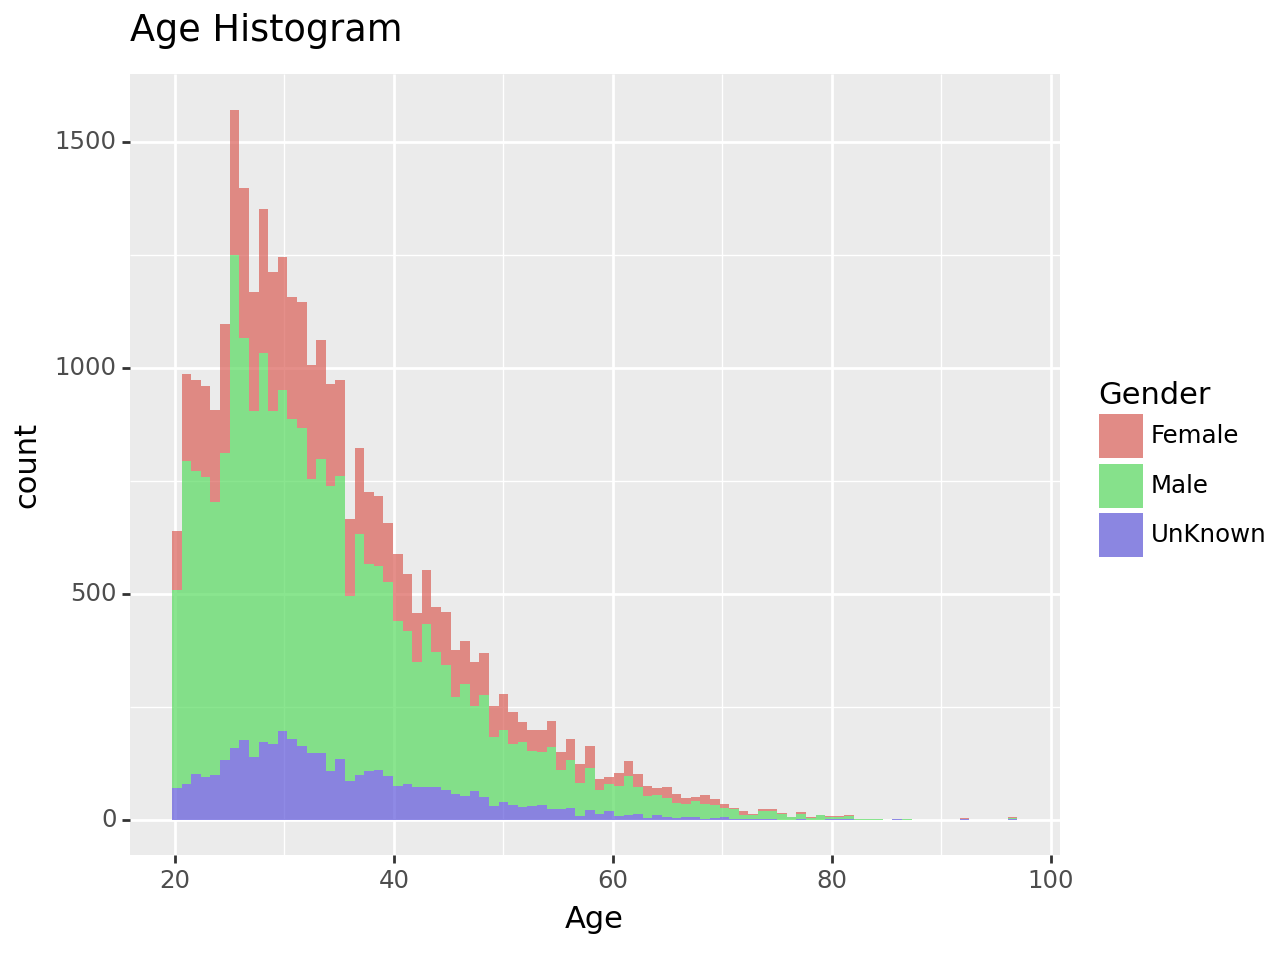

<Figure Size: (640 x 480)>

In [25]:
#Age Analysis
(ggplot(data, aes(x='Age',fill="Gender"))+
geom_histogram(alpha=0.7)+labs(title="Age Histogram"))

+ The histogram suggests that the majority of your customers of all three categories fall within the age range of 19 to 38 approx, Knowing the age distribution of your customers we can tailor the marketing strategies based on the age group.

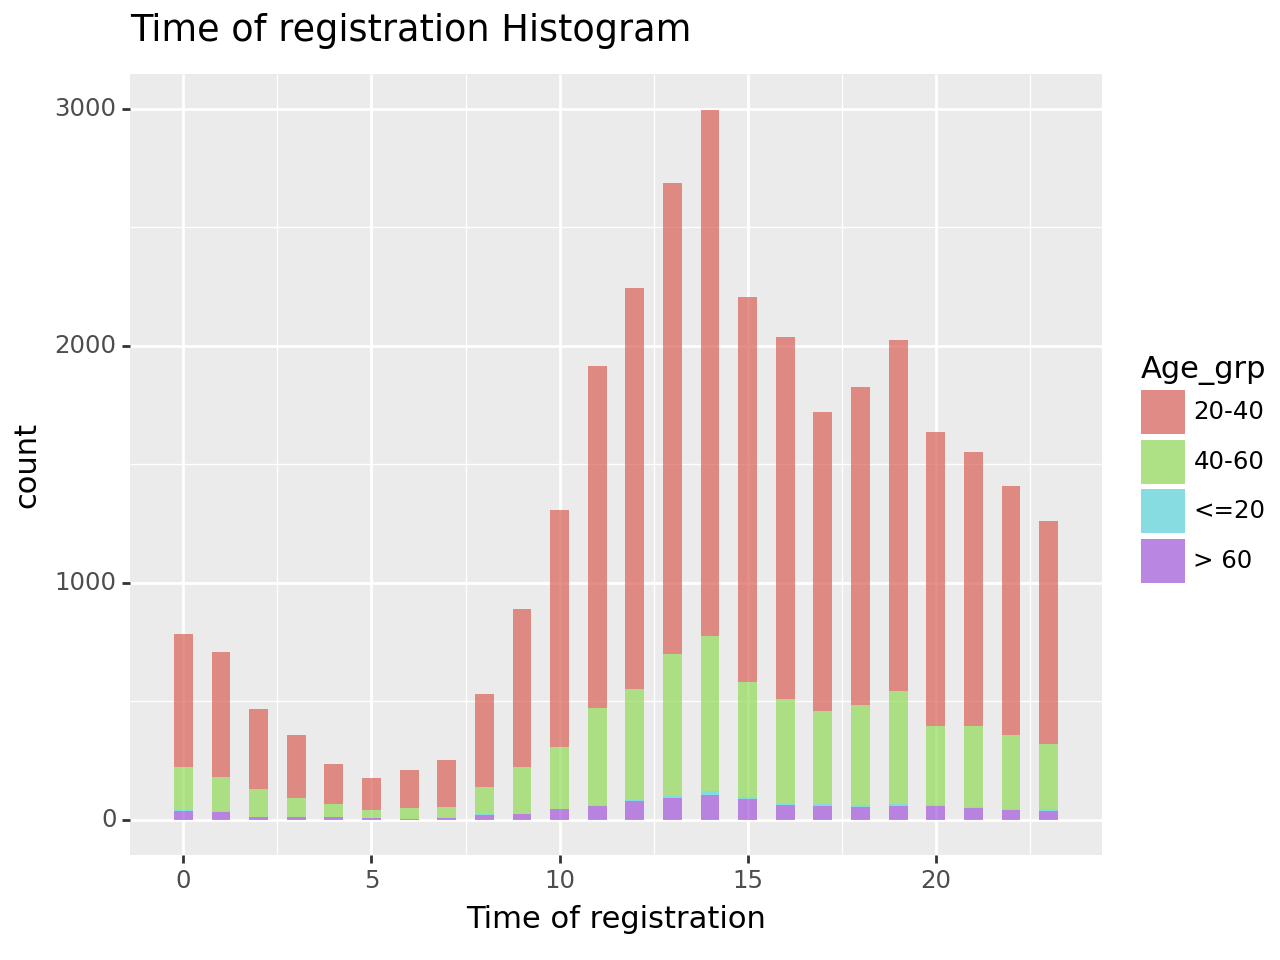

<Figure Size: (640 x 480)>

In [26]:
# active time analysis
(ggplot(data, aes(x='Time of registration',fill="Age_grp"))+
geom_histogram(bins=47,alpha=0.7)+labs(title="Time of registration Histogram "))

+ Based on our analysis, we have found that registration activity is most active during two key time periods: around noon (from 12:00 PM to 3:00 PM) and in the evening (from 6:00 PM to 9:00 PM). Given this insight, by aligning our "Source of Customer" strategies with these time-based insights, we can optimise our marketing efforts and increase our registration rates for a more effective and efficient approach.

+ Moreover, our analysis, categorised into various age groups, underscores that individuals aged 20 to 40 exhibit notably higher levels of engagement compared to other age groups. To harness this insight, we can strategically focus our efforts on this particular demographic, thereby increasing sales and maximising profitability.

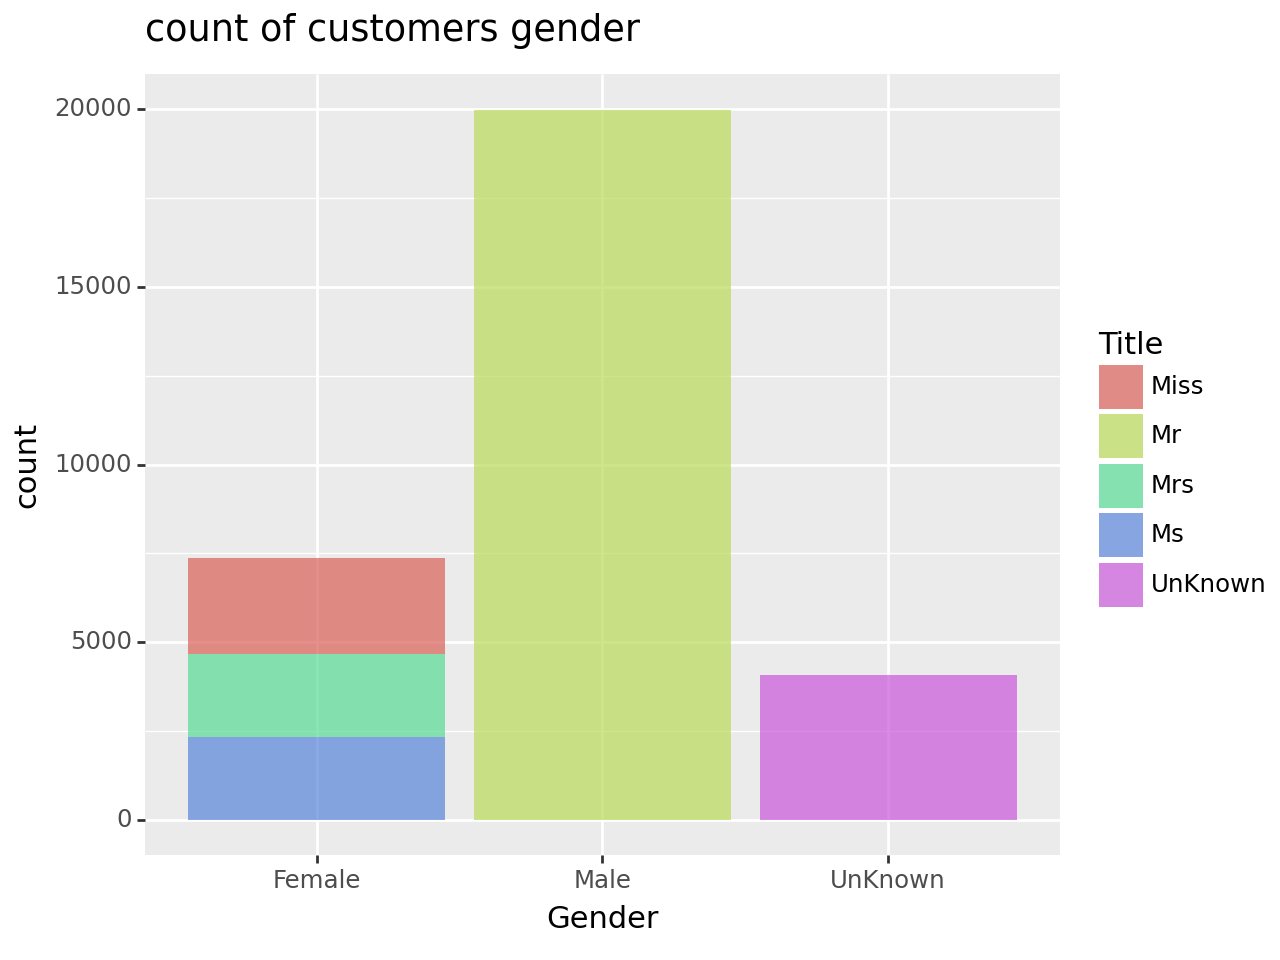

<Figure Size: (640 x 480)>

In [27]:
#count of customer belonging to certain gender
(ggplot(data, aes(x="Gender",fill="Title"))+
 geom_bar(alpha=0.7)+labs(title="count of customers gender"))

+ From the Above plot we can say that most customers who registered are mostly Male, Apart from Male and Female, we alse have a class called Unknown, where the customers have not provided their "Gender" details.

In [28]:
#profit and loss with respect to gender
labels = data["Gender"].unique()
profit_per_gen = []
loss_per_gen = []
for label in labels:
    profit = round(data[data["Gender"] == label]["Total profit"].sum(),2)
    profit_per_gen.append(profit)
    loss = round(data[data["Gender"] == label]["Total value of all promotions"].sum(),2)
    loss_per_gen.append(loss)
    
gender=pd.DataFrame({"Gender": labels, "Profit": profit_per_gen, "Loss": loss_per_gen})
gender["net profit"]=gender["Profit"]-gender["Loss"]
print(gender)

    Gender      Profit       Loss  net profit
0     Male  1038447.15  127286.60   911160.55
1   Female   278978.58   46091.78   232886.80
2  UnKnown   154640.47   24835.51   129804.96


+ All categories of gender provide a significant amount of profit, where the maximum profit is provided by the "male," i.e., 911160.55, and the least is provided by the female and unknown, 232886.80 and 129804.96, respectively.

+ Focus is needed on females and most often on the unknown category. Knowing the gender would be a great help in making strategies and recommending goods, which would in turn lead to profit.

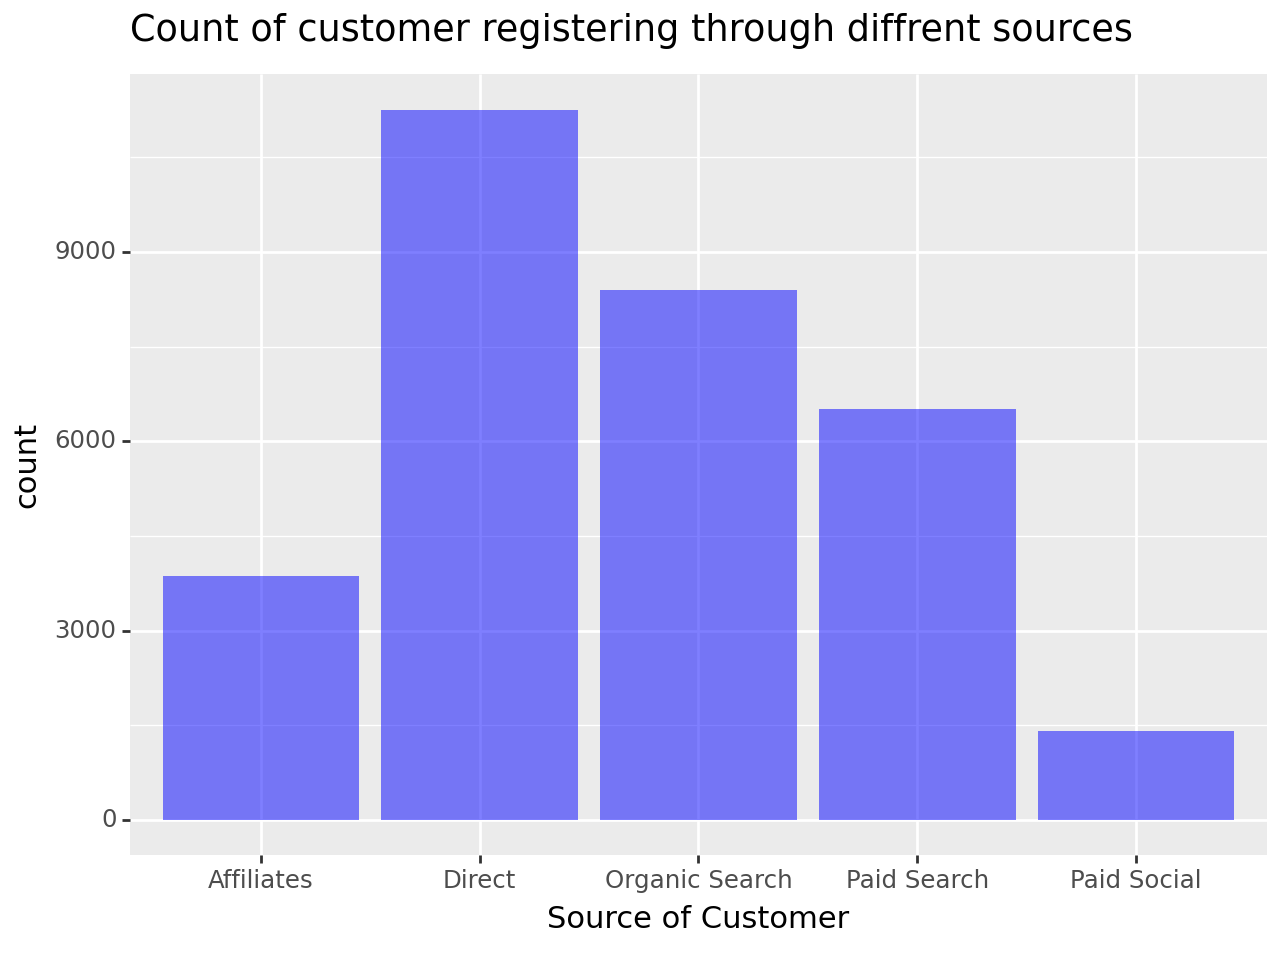

<Figure Size: (640 x 480)>

In [29]:
#Count of customer registering from diffrent sources
(ggplot(data,aes(x="Source of Customer"))+
geom_bar(alpha=0.5,fill="blue")+labs(title="Count of customer registering through diffrent sources"))

+ The above plot shows the count of customers being registered through various sources. From this plot, we can tell that most customers have registered through the "direct" method, and the least registered source is "paid social." We need to focus on boosting the sources through which fewer customers are registered. Let's analyse the profit and loss contribution and net profit with respect to these sources.

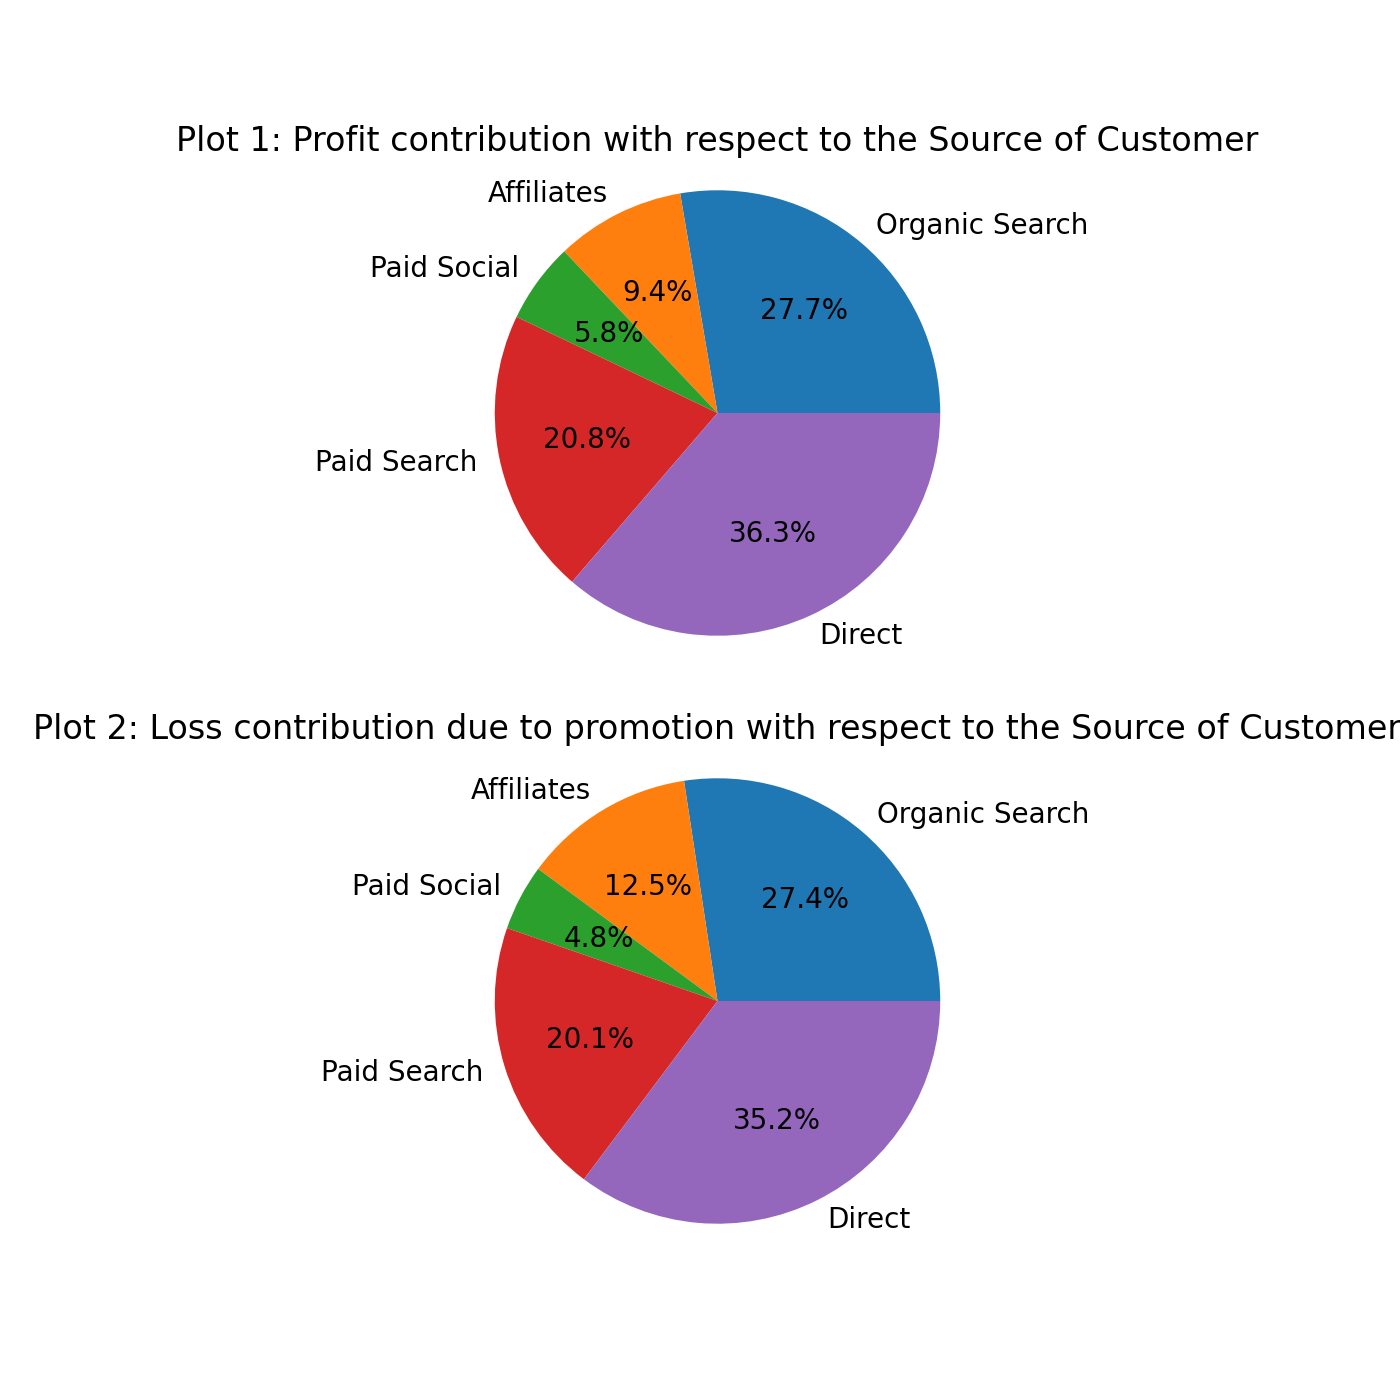

In [30]:
#Count of customers registering through diffrent resources
plt.figure(figsize=(7,7))
labels = data["Source of Customer"].unique()
profit_per = []
loss_per = []
for source in labels:
    profit = (data[data["Source of Customer"] == source]["Total profit"].sum() / data["Total profit"].sum()) * 100
    profit_per.append(profit)
    loss = (data[data["Source of Customer"] == source]["Total value of all promotions"].sum() / data["Total value of all promotions"].sum()) * 100
    loss_per.append(loss)
    
#plot 1
plt.subplot(2, 1, 1)
plt.pie(profit_per, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Plot 1: Profit contribution with respect to the Source of Customer")
#plot 2
plt.subplot(2, 1, 2)
plt.pie(loss_per, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Plot 2: Loss contribution due to promotion with respect to the Source of Customer")

plt.show()

**Plot 1:**

+ It looks like "direct" and "organic search" are significant contributors to your profit as more people have registered through these sources, but the area that needs concentration is paid search, affiliates, and paid social. Affiliates and paid social media currently contribute the least to the profit. This is an aggregate analysis for all three months.

**Plot 2:**

+ "Direct" and "Organic Search" are contributing very high profit and loss. They can be considered stable channels, yet they need to be improved. The areas of concentration should be "paid search," "affiliates," and "paid social," since these sources have a notable impact on profit and loss. This is an aggregate analysis for all three months.


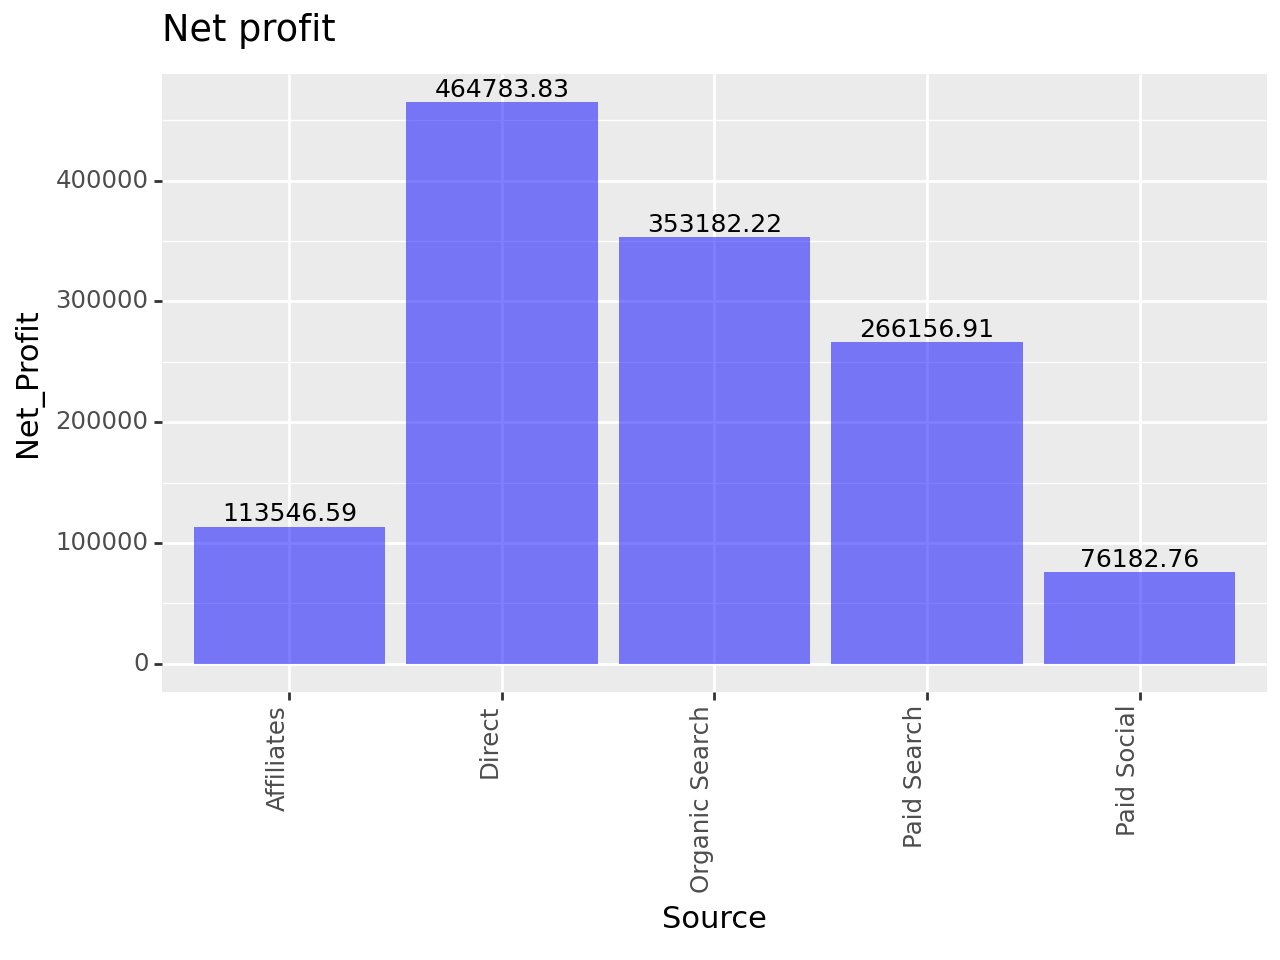

<Figure Size: (640 x 480)>

In [31]:
sources=data["Source of Customer"].unique()
net_profit=[]
for source in sources:
    net_profit.append(round(data[data["Source of Customer"]==source]["Total profit"].sum()-\
                           data[data["Source of Customer"]==source]["Total value of all promotions"].sum(),2))
source_profit_df = pd.DataFrame({'Source': sources, 'Net_Profit': net_profit})

(ggplot(source_profit_df, aes(x='Source', y='Net_Profit')) +
 geom_bar(stat='identity', fill='blue',alpha=0.5) +
 geom_text(aes(label='Net_Profit'), va='bottom', size=9, nudge_y=20) +
 theme(axis_text_x=element_text(angle=90, hjust=1))+labs(title="Net profit")
)

**Summary**

+ Like I said, "direct" and "organic search" are stable profit contributors. Attention is needed towards "paid social" and "affiliates" as their net worth is the lowest among all 5 sources.

+ To boost the "Paid Search" , "Affiliates," and "Paid Social" sources, from the insights gained, we can target customers of a specific age group, creating marketing campaigns that really resonate with them. Second, by studying when customers tend to register and be active, we can time our marketing efforts for "affiliates" and "paid social" during these peak hours. By doing this, we can increase our chances of getting more customers from these sources, which could lead to more profit.


### Lets look into more details regarding, profit and loss is actually made by  "Paid Search" and "Affiliates" ?.. 

***Note : I'm assuming th cost data are the expenses regarding the "Paid Search" and "Affiliates" (I compare cost details with profit and loss per month, I compared it with "net profit", since the values did'nt match i made this assumption)***

In [32]:
cost.head()

,Month,Paid Search,Affiliates
0,2013-01-01,41512.00,16421
1,2013-02-01,61243.00,42101
2,2013-03-01,84597.88,141321


Assuming the cost data as the Expences w.r.t "Paid Search" and "Affiliates" we contune our Analysis

In [33]:
months = ["1", "2", "3"]

# Initialize an empty list to store DataFrames for each month
monthly_dataframes = []

# Looping through each month and create DataFrames
for month in months:
    df = pd.DataFrame([
        {"profit": data[(data["Source of Customer"] == "Paid Search") & (data["month of registration"] == month)]["Total profit"].sum(),
         "loss": data[(data["Source of Customer"] == "Paid Search") & (data["month of registration"] == month)]["Total value of all promotions"].sum()},
    ], index=["paid social-" + month])

    monthly_dataframes.append(df)

# Concatenate the list of DataFrames into a single DataFrame
profit_loss_ps = pd.concat(monthly_dataframes, axis=0)

In [34]:
#net profit
profit_loss_ps["net profit"]=profit_loss_ps["profit"]-profit_loss_ps["loss"]

In [35]:
#Total net profit after removing expenses
profit_loss_ps["Total net profit"]=profit_loss_ps["net profit"].values-cost["Paid Search"].values

In [36]:
profit_loss_ps

,profit,loss,net profit,Total net profit
paid social-1,67333.33172,9601.505153,57731.826567,16219.826567
paid social-2,127639.17920,16776.682643,110862.496557,49619.496557
paid social-3,110968.44464,13405.852976,97562.591664,12964.711664


Paid social is significantly making profit, yet needs improvement.

In [37]:
months = ["1", "2", "3"]

# Initialize an empty list to store DataFrames for each month
monthly_dataframes = []

# Looping through each month and create DataFrames
for month in months:
    df = pd.DataFrame([
        {"profit": data[(data["Source of Customer"] == "Affiliates") & (data["month of registration"] == month)]["Total profit"].sum(),
         "loss": data[(data["Source of Customer"] == "Affiliates") & (data["month of registration"] == month)]["Total value of all promotions"].sum()},
    ], index=["Affiliates-"+month])

    monthly_dataframes.append(df)

# Concatenate the list of DataFrames into a single DataFrame
profit_loss_A = pd.concat(monthly_dataframes, axis=0)

In [38]:
#net profit
profit_loss_A["net profit"]=profit_loss_A["profit"]-profit_loss_A["loss"]

In [39]:
#Total net profit after removing expenses
profit_loss_A["Total net profit"]=profit_loss_A["net profit"].values-cost["Affiliates"].values

In [40]:
profit_loss_A

,profit,loss,net profit,Total net profit
Affiliates-1,28057.285872,5603.312927,22453.972945,6032.972945
Affiliates-2,26091.102520,4513.514723,21577.587797,-20523.412203
Affiliates-3,84161.963872,14646.932838,69515.031034,-71805.968966


Overall, it is evident that the 'Affiliates' category demands significant attention and analysis due to its overall negative contribution to the total net profit, even after accounting for expenses and losses.

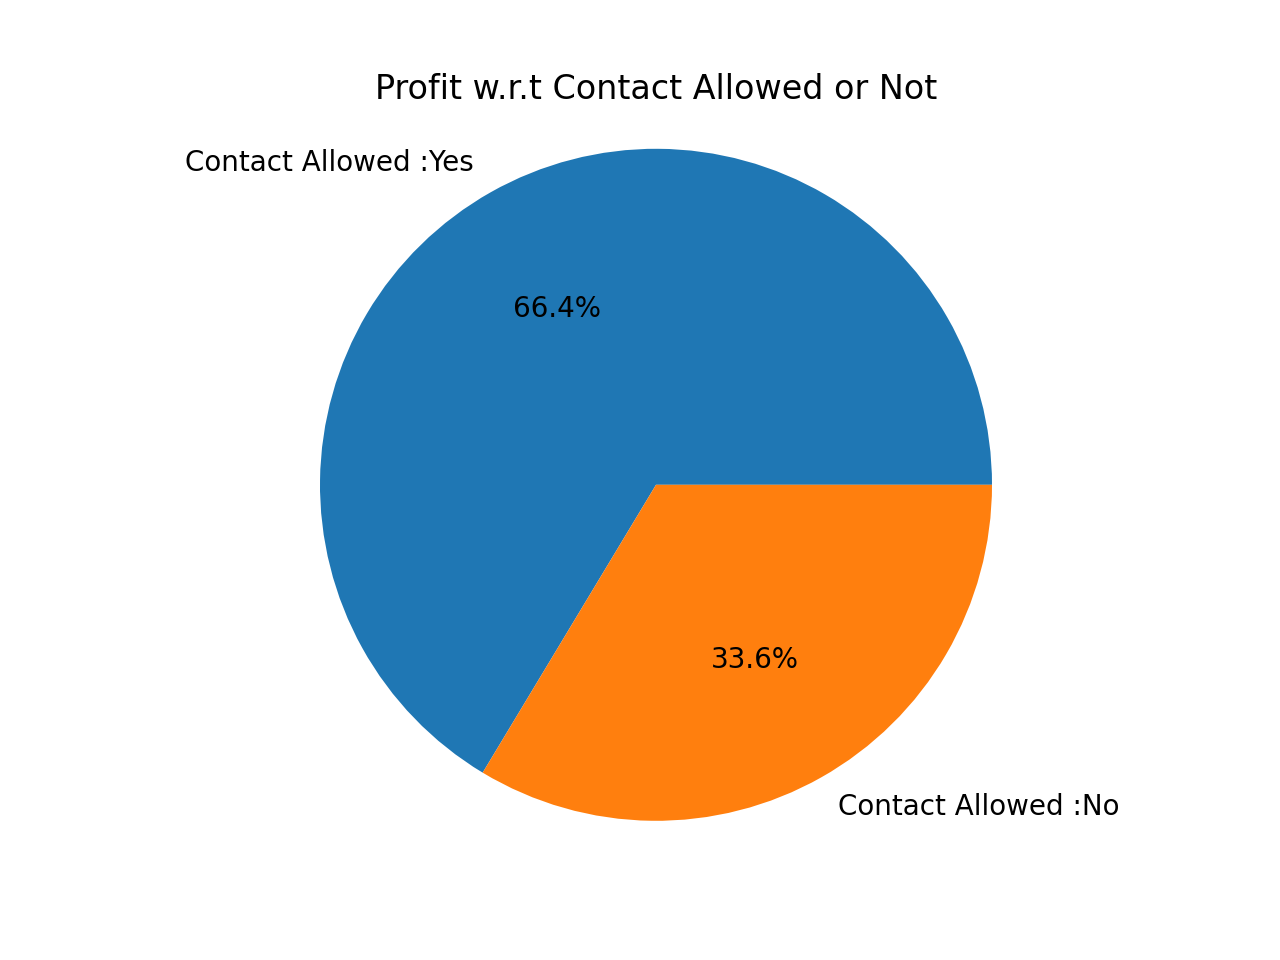

In [41]:
#profit and loss with respect to contact being allowed or not
profit_per=[(data[data["Contact Allowed"]=="Y"]["Total profit"].sum()/data["Total profit"].sum())*100,
            (data[data["Contact Allowed"]=="N"]["Total profit"].sum()/data["Total profit"].sum())*100]

loss_per=[(data[data["Contact Allowed"]=="Y"]["Total value of all promotions"].sum()/data["Total profit"].sum())*100,
            (data[data["Contact Allowed"]=="N"]["Total value of all promotions"].sum()/data["Total profit"].sum())*100]
#net profit
net_profit_contact=[x - y for x, y in zip(profit_per, loss_per)]

labels=["Contact Allowed :Yes","Contact Allowed :No"]

plt.pie(net_profit_contact, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  
plt.title("Profit w.r.t Contact Allowed or Not")
plt.show()

In [42]:
#Actual figures of Net profit and loss
print("Profit from contact Allowed :"+str((data[data["Contact Allowed"]=="Y"]["Total profit"].sum()/data["Total profit"].sum())*\
      (data["Total profit"].sum())))

print("Profit from contact Not Allowed :"+str((data[data["Contact Allowed"]=="N"]["Total profit"].sum()/data["Total profit"].sum())*\
                   (data["Total profit"].sum())))

Profit from contact Allowed :959535.1941939449
Profit from contact Not Allowed :512531.009152


+ Contact Allowed (Profit): It indicates that approximately 66.4%, i.e., 959535.20 EUR, of the total profit is attributed to customers who have agreed to be contacted.

+ Contact Not Allowed (Profit): It indicates that approximately 33.6%, i.e., 512531.00 EUR, of the total profit is attributed to customers who have not allowed themselves to be contacted.

+ The "Contact Allowed" status of a customer can have a significant influence on net profit contribution. With this information, we can try influencing customers to provide their contact information in exchange for "discounts, free delivery," etc. This way, we can make our customers happy while increasing our earnings.

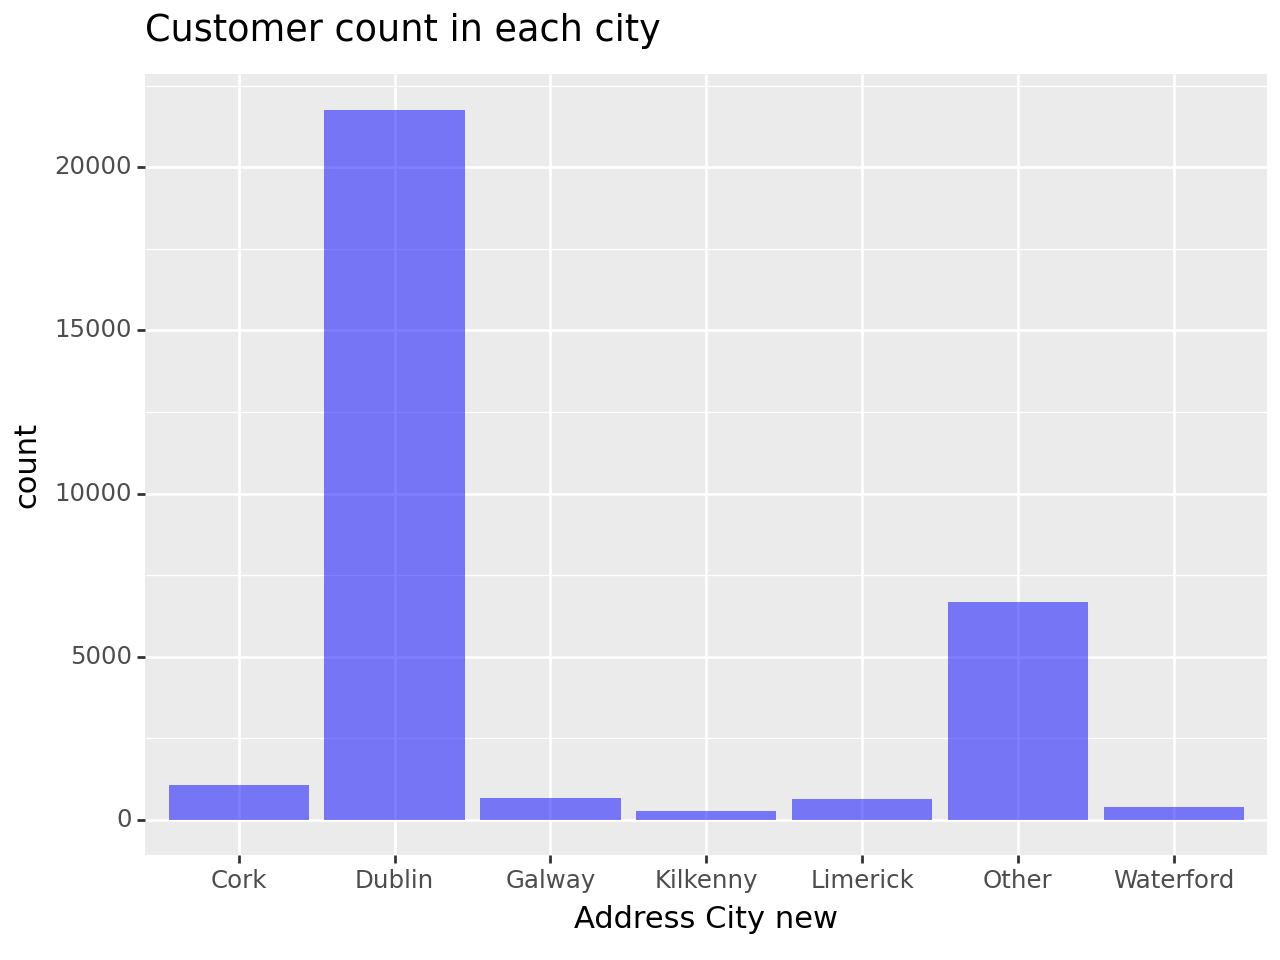

<Figure Size: (640 x 480)>

In [43]:
#bar plot for count of number of people registered from diffrent cities
(ggplot(data,aes(x="Address City new"))+
   geom_bar(alpha=0.5,fill="blue")+labs(title="Customer count in each city"))

+ Maximun Customer who registered: out of the top 6 cities, "Dublin" and "Other[aggregate of all other cities except the top 6]. We need to focus on other cities apart from Dublin in order to increase the number of registrations and profitability. As of now, let's analyze the profit and loss contributions of the top six plus others and see where to focus our attention.

In [44]:
cities=data["Address City"].unique()
net_profit_city=[]
#looping through diffrent cities for net profit 
for city in cities:
    net_profit_city.append(round(data[data["Address City new"]==city]["Total profit"].sum()-\
                           data[data["Address City new"]==city]["Total value of all promotions"].sum(),2))
source_profit_df = pd.DataFrame({'Source': cities, 'Net_Profit': net_profit_city})

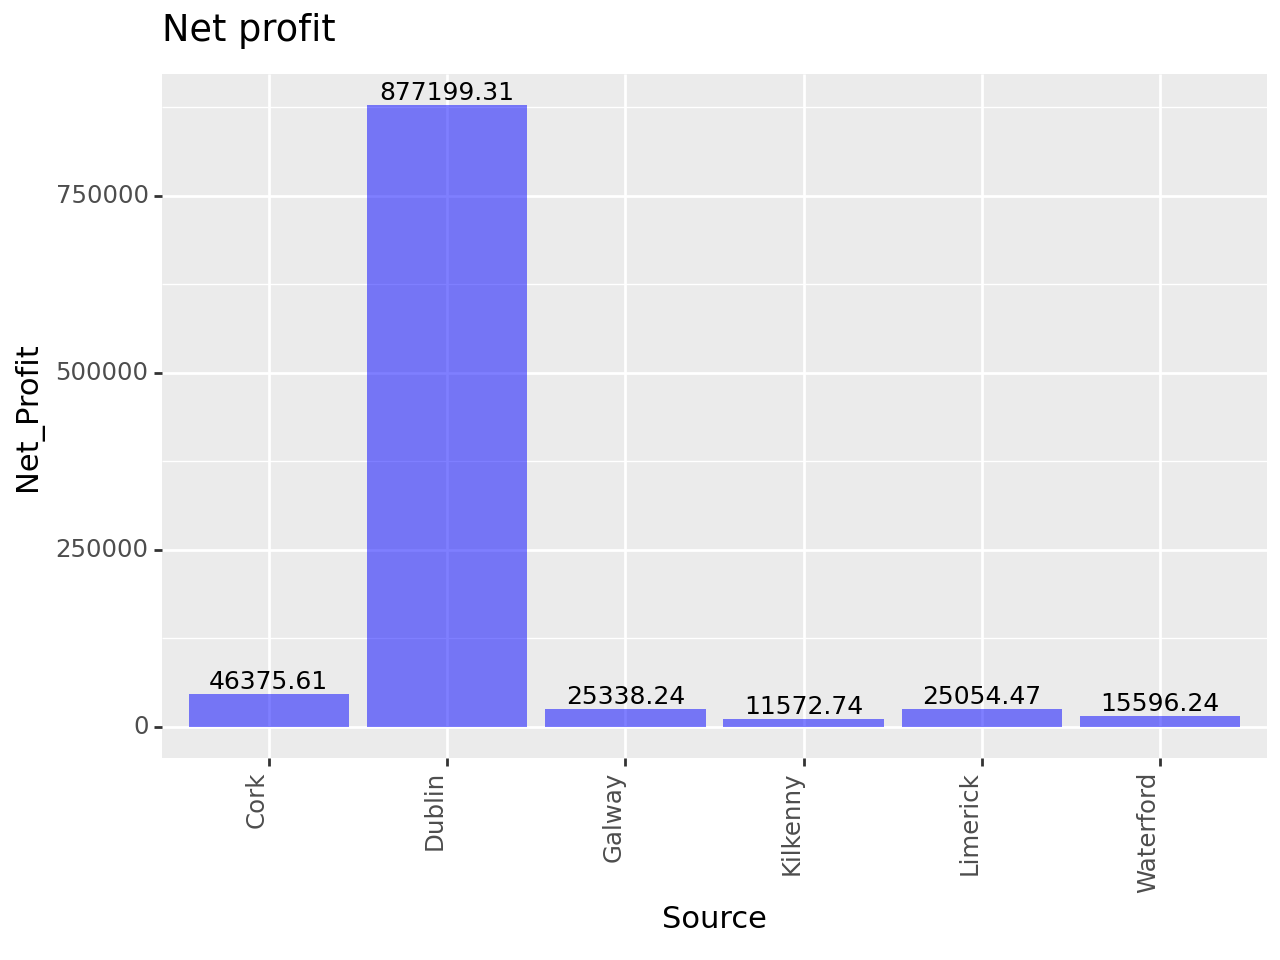

<Figure Size: (640 x 480)>

In [45]:
(ggplot(source_profit_df[source_profit_df["Net_Profit"]>0], aes(x='Source', y='Net_Profit')) +
 geom_bar(stat='identity', fill='blue',alpha=0.5) +
 geom_text(aes(label='Net_Profit'), va='bottom', size=9, nudge_y=20) +
 theme(axis_text_x=element_text(angle=90, hjust=1))+labs(title="Net profit")
)

In [50]:
print("cities which are neither providing loss nor profit : "+ str(len(source_profit_df[source_profit_df["Net_Profit"]==0]\
                                                                       ["Source"])))
print("cities which are providing loss : "+ str(len(source_profit_df[source_profit_df["Net_Profit"]<0]\
                                                                       ["Source"])))

cities which are neither providing loss nor profit : 44
cities which are providing loss : 0


+ In this analysis, we are looking at cities that actually make a profit and make a significant contribution to the overall company. Dublin is providing the highest net profit, and Killkenny is the least we need to improve in generating profit from these cities.

+ There are no cities that are providing visible loss, but there are 44 cities that are neither providing loss nor profit, which needs serious attention as these countries are on the verge of providing loss.

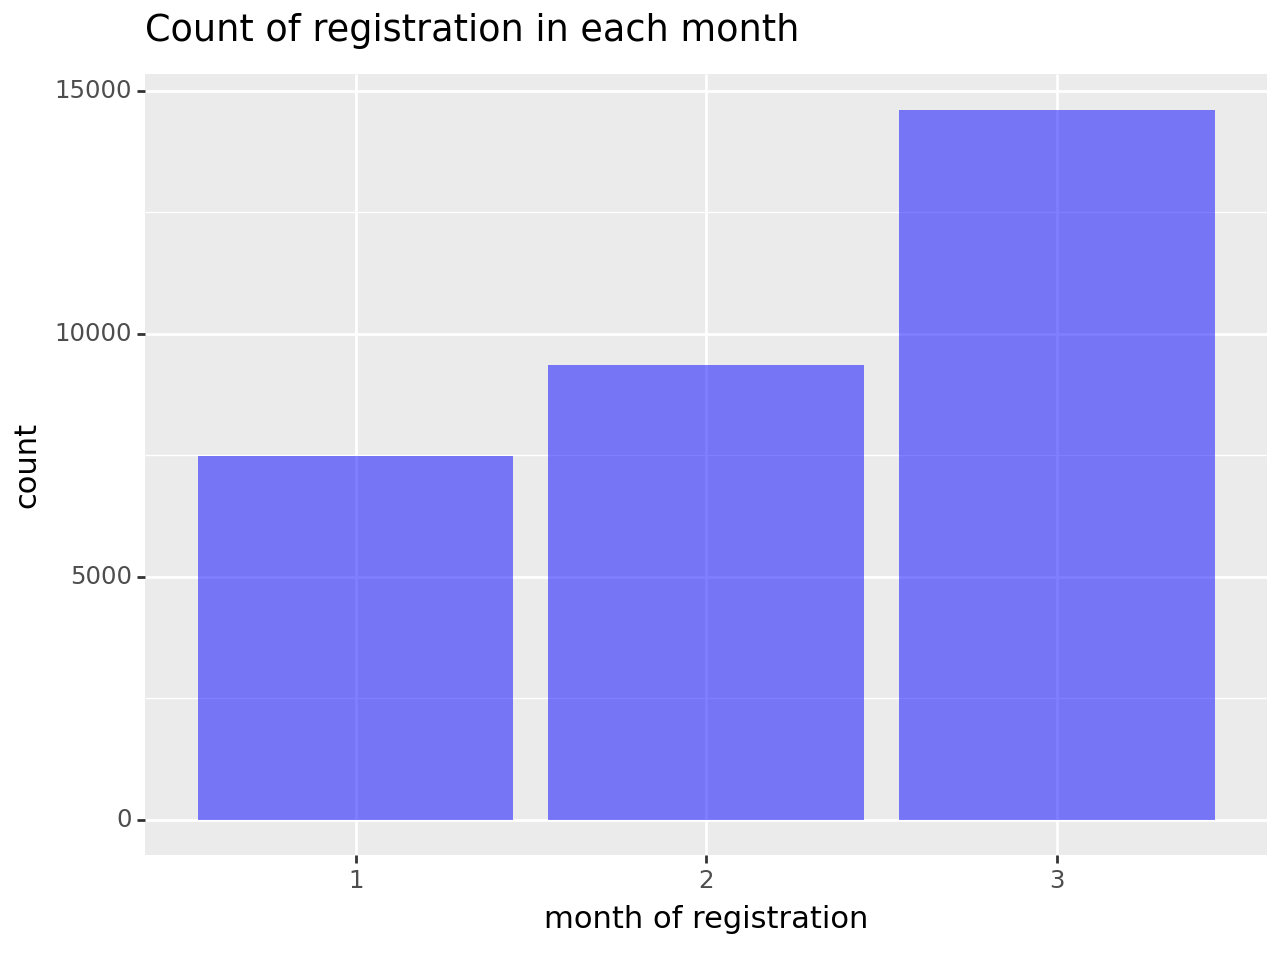

<Figure Size: (640 x 480)>

In [47]:
#registrations per month
(ggplot(data, aes(x="month of registration"))+
 geom_bar(alpha=0.5,fill="blue")+labs(title="Count of registration in each month"))

+ The dataset has information on the registrations done in the months of "JAN,FEB," and "MAR", From the above plot, we can see that most of the registration is done in the third month "MAR." and the least is in the month of "Jan." As the month passes, the number of people registering is increasing. Let us further analyze their profit and loss variations with respect to the months.

In [48]:
profit_per_month = []
loss_per_month = []
labels=["1","2","3"]
#looping through diffrent months 
for label in labels:
    profit_per_month.append(data[data["month of registration"] ==label ]["Total profit"].sum())
    loss_per_month.append(data[data["month of registration"] ==label]["Total value of all promotions"].sum())

mothly_profit_loss=pd.DataFrame({"month":["Jan","Feb","Mar"],"profit_per_month":profit_per_month,"loss_per_month":loss_per_month})
mothly_profit_loss["net_profit"]=mothly_profit_loss["profit_per_month"]-mothly_profit_loss["loss_per_month"]

mothly_profit_loss

,month,profit_per_month,loss_per_month,net_profit
0,Jan,303957.153258,43187.208476,260769.944782
1,Feb,433439.789416,58617.510772,374822.278644
2,Mar,734669.260672,96409.169722,638260.090950


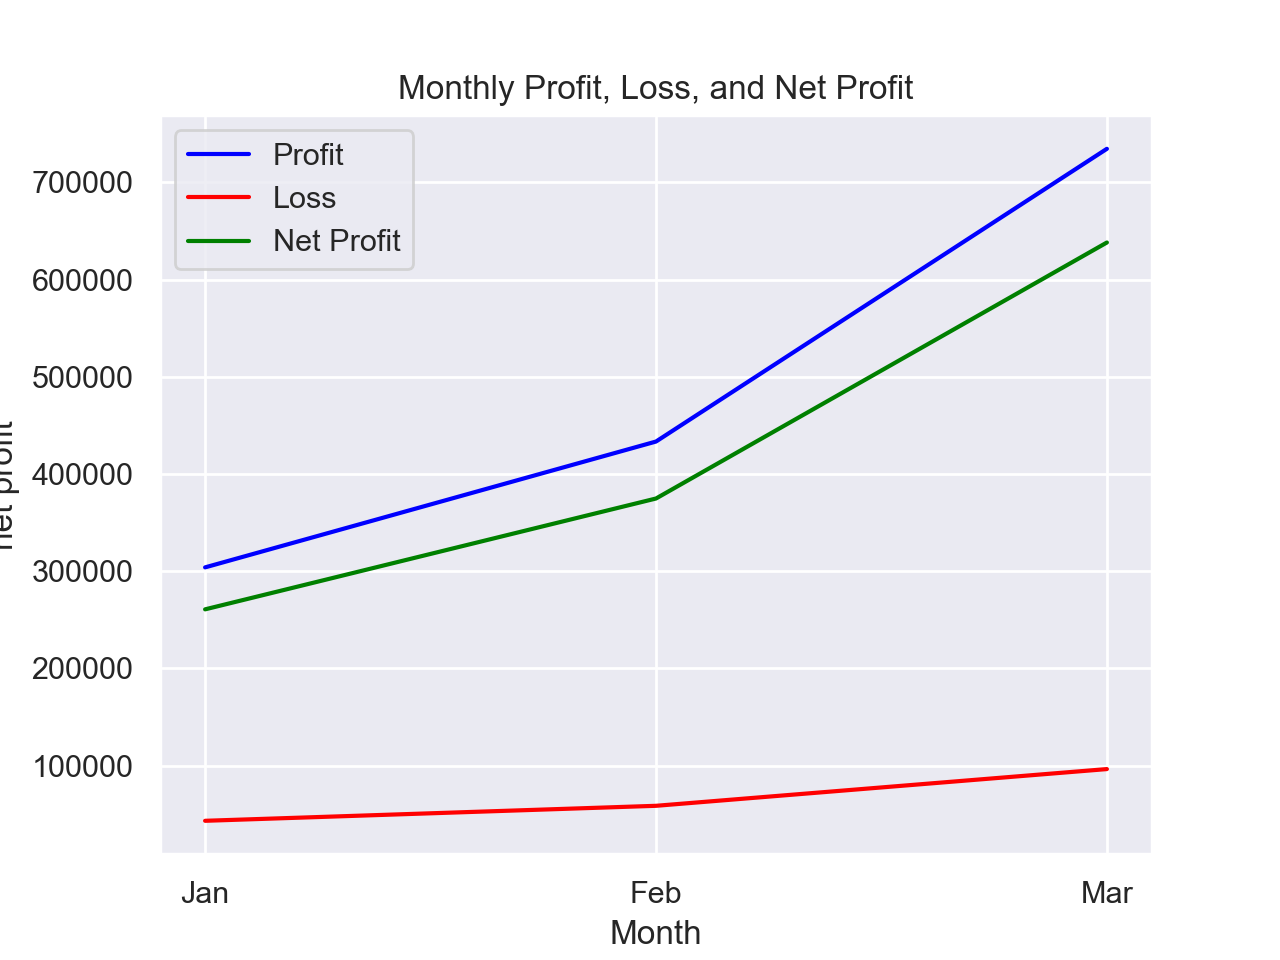

In [49]:
sns.set(style="darkgrid")
sns.lineplot(data=mothly_profit_loss, x="month", y="profit_per_month", label="Profit", color="blue")
sns.lineplot(data=mothly_profit_loss, x="month", y="loss_per_month", label="Loss", color="red")
sns.lineplot(data=mothly_profit_loss, x="month", y="net_profit", label="Net Profit", color="green")

# Set plot labels and title
plt.xlabel("Month")
plt.ylabel("net profit")
plt.title("Monthly Profit, Loss, and Net Profit")
plt.legend()
plt.show()

+ We are visualizing profit and loss and net profit percentages by month of registration using a line plot. From the above plot, the profit
+ Trend: There is an increasing trend in both profit, loss, and net profit; by March, the company is turning towards profit. The number of customers registering is also observed to be at its maximum in March.

+ The company's financial performance appears to be quite good when we look at the months of January, February, and March.

+ There's room for them to get even better, though. By figuring out why the number of people registered in January is less and profit as well, what changes did they make in the next two months so that the profit increased??

+ Overall, we have a picture of the company doing a decent job of balancing the money they make and the money they spend.